In [1]:
import os
#import skimage
import torch
from torchvision import transforms
import numpy as np
import glob
from skimage import io
import skimage
import matplotlib.pyplot as plt
from Custom_dataloader import *
from Transforms import phantom_segmentation
from Transforms import entropy_mark_transform
from Transforms import hsv_stats_transfrom
from Transforms import lab_stats_transfrom
from Transforms import black_perc_transfrom
from Transforms import ndvi_desc
from Transforms import multi_image_resize
import matplotlib.pyplot as plt

#DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=paltas,volume=Paltas_DataBase/Data_Base_v2"
d_t=transforms.Compose([
                        ndvi_desc(),
        multi_image_resize(ImType=['SenteraNDVI'],size=(512,512)),
                       ])


In [2]:
#d_t=transforms.Compose([sentera_segmentation(False)])
tdatab=Dataset_direct(root_dir=DB,ImType=['SenteraRGB','SenteraNIR','SenteraMASK'],Trees_fil='*',Intersec=False,transform=d_t)
#datab=Dataset_direct(root_dir=DB,ImType=['SenteraRGB','SenteraNIR','SenteraMASK'],Trees_fil='*',Intersec=False)

In [3]:
tdatab[0]

{'SenteraNDVI': array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        ...,
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]]),
 'landmarks': 'N_Control'}

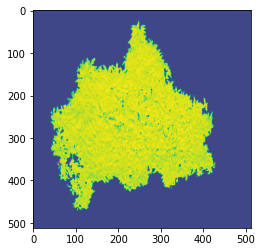

In [4]:
plt.imshow(tdatab[0]['SenteraNDVI'])

In [5]:
tdatab[0]['SenteraNDVI'].min()

0.3654907719311833

In [6]:
tdatab[0]['SenteraNDVI'].max()

0.9977422855929772

In [8]:
import matplotlib.pyplot as plt
im = tdatab[0]['SenteraNDVI']

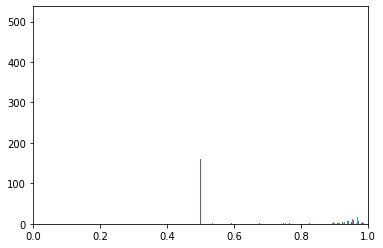

In [10]:
b, bins, patches = plt.hist(im, 255)
plt.xlim([0,1])
plt.show()